<a href="https://colab.research.google.com/github/VIHAN-droid/AI-ML-PROJECT/blob/main/SUPERVISED%20LEARNING/LOGISTIC%20REGRESSION/LOR_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

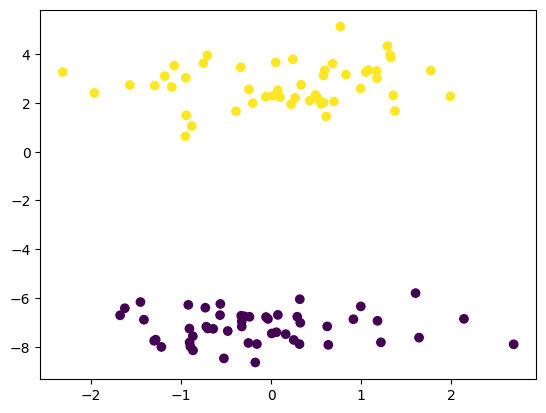

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=6,hypercube=False,class_sep=10)
plt.scatter(x[:,0] , x[:,1] ,c = y)

In [25]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(x,y)
print(lor.intercept_ , lor.coef_)

m1 = -(lor.coef_[0][0] / lor.coef_[0][1])
c1 = -(lor.intercept_[0] / lor.coef_[0][1])

[2.93212133] [[0.00398934 1.26170069]]


In [26]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# USING GD FOR LOG REG

In [27]:
def lor_gd(x,y,lr,epochs):
  x = np.insert(x,0,1,axis=1)
  coefs = np.ones(x.shape[1])

  for _ in range(epochs):
    coefs = coefs + lr * ( np.dot(y - sigmoid(np.dot(x,coefs)) , x) / x.shape[0])

  return coefs[0] , coefs[1:]

In [39]:
interc , coeffs = lor_gd(x,y,0.5,2500)
m2 = -(coeffs[0] / coeffs[1])
c2 = -(interc / coeffs[1])

In [43]:
def lor(x,y,learning_rate,epochs):
  x = np.insert(x,0,1,axis=1)
  coeff = np.ones(x.shape[1])

  for _ in range(epochs):
    i = np.random.randint(0,x.shape[0])
    a = sigmoid(np.dot(coeff,x[i]))
    coeff = coeff + learning_rate * (y[i] - a) * x[i]

  return coeff[0] , coeff[1:]

intercept , coefficients = lor(x,y,0.1,1000)
m = - (coefficients[0] / coefficients[1])
c = - (intercept / coefficients[1])

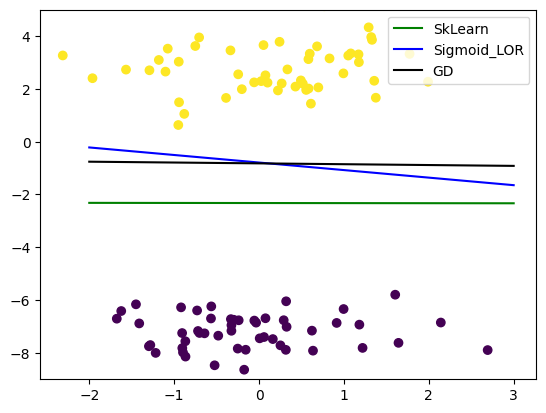

In [44]:
x_plot = np.linspace(-2,3)
y_sklearn = m1 * x_plot + c1
y_gd = m2 * x_plot + c2
y_plot = m * x_plot + c
plt.scatter(x[:,0] , x[:,1] ,c = y)
plt.plot(x_plot , y_sklearn , color = "green" , label = "SkLearn")
plt.plot(x_plot,y_plot,color="blue",label="Sigmoid_LOR")
plt.plot(x_plot , y_gd , color = "black" , label = "GD")
plt.ylim(-9,5)
plt.legend()
plt.show()